
### Reto de aplicación





In [218]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler


### Lectura y preprocesamiento del conjunto de datos

Realizar un análisis descriptivo que incluya la cantidad y tipo de variables que se tienen en el
conjunto de datos 

In [9]:
# leer el conjunto de datos a utilizar
df = pd.read_csv(r'Employee_Attrition.csv')

# mostrar las primeras 3 líneas del dataframe
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


Obtener la información de dicha base de datos que incluya el número de registros, el total de
variables, el tipo de cada variable, la cantidad de datos perdidos de cada variable.

In [13]:
# Número de registros y total de variables

print("La base de datos contiene", df.shape[0], "registros y", df.shape[1],"variables")

La base de datos contiene 1470 registros y 35 variables


In [61]:
# Tipo y número de variables

df_types = pd.DataFrame(df.dtypes)
df_types = df_types[0].value_counts()

print("Los tipos de variables y número de variables por tipo se muestran en la siguiente tabla: \n \n", df_types)



Los tipos de variables y número de variables por tipo se muestran en la siguiente tabla: 
 
 int64     26
object     9
Name: 0, dtype: int64


In [29]:
# Determinar la cantidad de datos faltantes en las columnas

df_null = pd.DataFrame(df.isnull().sum())
missing_values = df_null[df_null[0]>0].count()

print("La base de datos contiene", missing_values[0],"columnas con valores faltantes")


La base de datos contiene 0 columnas con valores faltantes


### Selección de variables

Borra las variables que consideres no deben estar en el modelo. Justifica cada decisión de las
variables eliminadas.

In [244]:
# Selección de variables para el análisis

df_dtypes = pd.DataFrame(df.dtypes).reset_index()
df_dtypes.set_axis(['Variable','Type'],axis=1,inplace=True)
df_unique = pd.DataFrame(df.nunique()).reset_index()
df_unique.set_axis(['Variable','DifF_Count'],axis=1,inplace=True)

df_var_type_count = df_dtypes.merge(df_unique,how="left")
df_var_type_count.head(5)

,Variable,Type,DifF_Count
0,Age,int64,43
1,Attrition,object,2
2,BusinessTravel,object,3
3,DailyRate,int64,886
4,Department,object,3


In [202]:
# Selección de variables a conservar

df_variables = df_var_type_count[(df_var_type_count['DifF_Count'] < df.shape[0]*0.60) & (df_var_type_count['DifF_Count'] > 1)]
variables = df_variables['Variable'].values

print("Se conservarán solamente las variables del tipo int que contengan n número de registros diferentes menor al 60 % del número total de registros puesto que variables con un número registros similar al número total de registros no proporcionan información suficiente para categorizar y agrupar los datos")
print("\n De las variabes del tipo object se seleccionaran las que tengan más de un valor diferente")

Se conservarán solamente las variables del tipo int que contengan n número de registros diferentes menor al 60 % del número total de registros puesto que variables con un número registros similar al número total de registros no proporcionan información suficiente para categorizar y agrupar los datos

 De las variabes del tipo object se seleccionaran las que tengan más de un valor diferente


In [144]:
# Discriminar variables del df original y crear dataset nuevo

df2 = df[variables]
print("El nuevo set de datos contiene", df2.shape[0], "registros y", df2.shape[1],"variables. Se han discriminado",(df.shape[1]-df2.shape[1]),"variables.")

El nuevo set de datos contiene 1470 registros y 28 variables. Se han discriminado 7 variables.


## Transformacion de variables

In [245]:
# Revisión de variables a utilizar

df_dtypes = pd.DataFrame(df2.dtypes).reset_index()
df_dtypes.set_axis(['Variable','Type'],axis=1,inplace=True)
df_unique = pd.DataFrame(df2.nunique()).reset_index()
df_unique.set_axis(['Variable','DifF_Count'],axis=1,inplace=True)

df_var_type_count = df_dtypes.merge(df_unique,how="left")
df_var_type_count.shape

(28, 3)

### Ordinal encoding

In [246]:
# Transformar datos categóricos a numéricos utilizando Ordinal Encoder

df3 = df2.copy()
for col in df3.columns:
    if df3[col].dtype == 'object':
        df3[col] = OrdinalEncoder().fit_transform(df3[[col]])

df3.head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,2.0,1,2,1.0,2,0.0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,0.0,1.0,1.0,8,1,1.0,3,1.0,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1.0,2,2,4.0,4,1.0,92,...,3,2,0,7,3,3,0,0,0,0


In [247]:
# Normalización de datos utilizando un escalador de datos

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

dataScaler = RobustScaler()
scaler = dataScaler.fit(df3)
dataScaled = scaler.transform(df3)

# muestra el arreglo resultante
dataScaled

array([[ 0.38461538,  1.        ,  0.        , ...,  0.2       ,
        -0.33333333,  0.4       ],
       [ 1.        ,  0.        , -1.        , ...,  0.8       ,
         0.        ,  0.8       ],
       [ 0.07692308,  1.        ,  0.        , ..., -0.6       ,
        -0.33333333, -0.6       ],
       ...,
       [-0.69230769,  0.        ,  0.        , ..., -0.2       ,
        -0.33333333,  0.        ],
       [ 1.        ,  0.        , -1.        , ...,  0.6       ,
        -0.33333333,  1.        ],
       [-0.15384615,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.2       ]])

In [248]:
# Creación de un dataframe con los datos normalizados

data = pd.DataFrame(dataScaled)
data.columns = df3.columns

# muestra las primeras 5 líneas del dataframe resultante
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.384615,1.0,0.0,1.0,-0.500000,-0.5,-0.5,-0.5,-1.0,0.783217,...,0.0,-1.0,-1.0,-0.222222,-3.0,-2.0,0.166667,0.2,-0.333333,0.4
1,1.000000,0.0,-1.0,0.0,0.083333,-1.0,-0.5,0.0,0.0,-0.139860,...,1.0,0.5,0.0,0.000000,0.0,0.0,0.833333,0.8,0.000000,0.8
2,0.076923,1.0,0.0,0.0,-0.416667,-0.5,1.0,0.5,0.0,0.727273,...,0.0,-0.5,-1.0,-0.333333,0.0,0.0,-0.833333,-0.6,-0.333333,-0.6
3,-0.230769,0.0,-1.0,0.0,-0.333333,0.5,-0.5,0.5,-1.0,-0.279720,...,0.0,0.0,-1.0,-0.222222,0.0,0.0,0.500000,0.8,0.666667,-0.6
4,-0.692308,0.0,0.0,0.0,-0.416667,-1.0,0.5,-1.0,0.0,-0.727273,...,0.0,0.5,0.0,-0.444444,0.0,0.0,-0.500000,-0.2,0.333333,-0.2


In [249]:
# muestra la información condensada del dataframe
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   float64
 3   Department                1470 non-null   float64
 4   DistanceFromHome          1470 non-null   float64
 5   Education                 1470 non-null   float64
 6   EducationField            1470 non-null   float64
 7   EnvironmentSatisfaction   1470 non-null   float64
 8   Gender                    1470 non-null   float64
 9   HourlyRate                1470 non-null   float64
 10  JobInvolvement            1470 non-null   float64
 11  JobLevel                  1470 non-null   float64
 12  JobRole                   1470 non-null   float64
 13  JobSatisfaction           1470 non-null   float64
 14  MaritalS

## Creación de conjuntos de entrenamiento y prueba

In [250]:
# Crea los conjuntos de entrenamiento (80%) y prueba (20%)

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.4, random_state=123)

X_train, y_train = train_df.drop(columns=["Attrition"], axis=1), train_df["Attrition"]
X_test, y_test = test_df.drop(columns=["Attrition"], axis=1), test_df["Attrition"]

# Muestra la forma de los distintos conjuntos de datos obtenidos
print("Datos de entrenamiento=", X_train.shape, y_train.shape)
print("Datos de prueba=", X_test.shape, y_test.shape)

Datos de entrenamiento= (882, 27) (882,)
Datos de prueba= (588, 27) (588,)


## Creación de Modelos de Aprendizaje

### Bosque Aleatorio

In [251]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de bosques aleatorios de 10 árboles con una profundidad máxima de 3
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rfcInicial_model = RandomForestClassifier(n_estimators=10, max_depth=3)
scores = pd.DataFrame(cross_validate(rfcInicial_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los 
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.8316962654969015
score promedio de validación =  0.8231230847803882


,fit_time,score_time,test_score,train_score
0,0.072912,0.010969,0.820225,0.841110
1,0.062710,0.010971,0.831461,0.827238
2,0.066300,0.013962,0.818182,0.828715
3,0.083734,0.012965,0.829545,0.824937
4,0.076553,0.017828,0.818182,0.835013
5,0.067576,0.011883,0.818182,0.833753
6,0.081357,0.016951,0.829545,0.827456
7,0.063105,0.011828,0.829545,0.828715
8,0.067360,0.011023,0.806818,0.840050
9,0.069366,0.013181,0.829545,0.829975


In [252]:
# Determinar los mejores valores de hiperparámetros para construir un bosque aleatorio para el problema

from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 7], 
              'max_features': ['sqrt', 'log2', None], 
              'n_estimators': [10, 30, 60, 100]}
rfc_grid = GridSearchCV(RandomForestClassifier(random_state=1), param_grid = parameters, 
                        return_train_score=True)
rfc_grid.fit(X_train, y_train)

# despliega los mejores hiperparámetros encontrados
print("Mejores hiperparámetros\n",rfc_grid.best_params_)

Mejores hiperparámetros
 {'max_depth': 5, 'max_features': None, 'n_estimators': 60}


In [253]:
# quédate con el Bosque Aleatorio con los mejores hiperparámetros encontrados y
# despliega su score con los datos del conjunto de prueba.
rfc_model = rfc_grid.best_estimator_
rfc_model.score(X_test, y_test)

0.8741496598639455

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       511
         1.0       0.58      0.14      0.23        77

    accuracy                           0.87       588
   macro avg       0.73      0.56      0.58       588
weighted avg       0.84      0.87      0.84       588



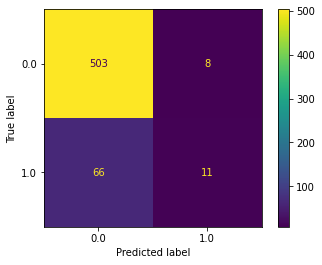

In [254]:
# calcula las matriz de confusión y las métricas de evaluación con el conjunto 
# de prueba para el mejor Bosque Aleatorio

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

ConfusionMatrixDisplay.from_estimator(rfc_model, X_test, y_test)
print(classification_report(y_test, rfc_model.predict(X_test)))  

### Regresión Logística

In [256]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de una Regresión Logística con C = 0.001 y solver = 'newton-cg'
from sklearn.linear_model import LogisticRegression

lrcInicial_model = LogisticRegression(C=0.001, solver='newton-cg')
scores = pd.DataFrame(cross_validate(lrcInicial_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los 
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.8185940582108563
score promedio de validación =  0.8185903983656793


,fit_time,score_time,test_score,train_score
0,0.113690,0.009972,0.820225,0.818411
1,0.095309,0.006044,0.820225,0.818411
2,0.101844,0.005109,0.818182,0.818640
3,0.085923,0.007981,0.818182,0.818640
4,0.083789,0.006045,0.818182,0.818640
5,0.085726,0.005691,0.818182,0.818640
6,0.105732,0.005976,0.818182,0.818640
7,0.085604,0.006022,0.818182,0.818640
8,0.098688,0.005984,0.818182,0.818640
9,0.093791,0.004985,0.818182,0.818640


In [257]:
# determina, entre algunas alternativas, los mejores valores de hiperparámetros 
# para construir una Regresión Logística para el problema
from sklearn.model_selection import RandomizedSearchCV

parameters = {'C': np.logspace(-4, 4, 50),
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lrc_rand = RandomizedSearchCV(LogisticRegression(random_state=1), n_iter=48,
                              param_distributions = parameters, 
                              return_train_score=True)
lrc_rand.fit(X_train, y_train)

# despliega los mejores hiperparámetros encontrados
print("Mejores hiperparámetros\n", lrc_rand.best_params_)

c:\Users\LCIBANEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\LCIBANEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\LCIBANEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\LCIBANEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\LCIBANEZ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached w

Mejores hiperparámetros
 {'solver': 'sag', 'C': 0.18420699693267145}


In [258]:
# quédate con la Regresión Logística con los mejores hiperparámetros encontrados y
# despliega su score con los datos del conjunto de prueba.
lrc_model = lrc_rand.best_estimator_
lrc_model.score(X_test, y_test)

0.8928571428571429

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       511
         1.0       0.72      0.30      0.42        77

    accuracy                           0.89       588
   macro avg       0.81      0.64      0.68       588
weighted avg       0.88      0.89      0.87       588



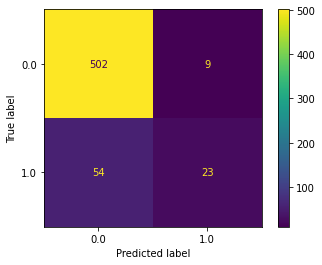

In [259]:
# calcula las matriz de confusión y las métricas de evaluación con el conjunto 
# de prueba para la mejor Regresión Logística
ConfusionMatrixDisplay.from_estimator(lrc_model, X_test, y_test)
print(classification_report(y_test, lrc_model.predict(X_test))) 

### Bayes Ingenuo Gaussiano

In [260]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de Bayes Ingenuo Gaussiano
from sklearn.naive_bayes import GaussianNB

gnbc_model = GaussianNB()

scores = pd.DataFrame(cross_validate(gnbc_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los 
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.8262792189847564
score promedio de validación =  0.8117977528089888


,fit_time,score_time,test_score,train_score
0,0.009974,0.004094,0.853933,0.828499
1,0.009862,0.006141,0.764045,0.828499
2,0.008093,0.004771,0.704545,0.822418
3,0.007142,0.004832,0.829545,0.824937
4,0.007870,0.004987,0.806818,0.827456
5,0.005985,0.004984,0.840909,0.831234
6,0.005995,0.003993,0.806818,0.827456
7,0.006925,0.005018,0.886364,0.817380
8,0.006980,0.003989,0.806818,0.832494
9,0.006982,0.004017,0.818182,0.822418


              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       511
         1.0       0.43      0.57      0.49        77

    accuracy                           0.85       588
   macro avg       0.68      0.73      0.70       588
weighted avg       0.87      0.85      0.85       588



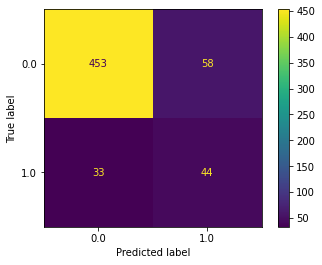

In [261]:
# calcula las matriz de confusión y las métricas de evaluación con el conjunto 
# de prueba para Bayes Ingenuo Gaussiano
gnbc_model.fit(X_train, y_train) # No se ha entrenado el modelo

ConfusionMatrixDisplay.from_estimator(gnbc_model, X_test, y_test)
print(classification_report(y_test, gnbc_model.predict(X_test)))  

### Máquina de Vectores de Soporte



In [262]:
# utiliza validación cruzada de 10 folds para evaluar el desempeño promedio
# de una Máquina de Vectores de Soporte con un parámetro de regularización de
# 0.01 y un kernel polinomial
from sklearn.svm import SVC

svmc_model = SVC(C=0.01, kernel="poly")

scores = pd.DataFrame(cross_validate(svmc_model, X_train, y_train, cv=10, return_train_score=True))

# despliega los score promedio de entrenamiento y validación, así como los 
# resultados obtenidos para cada uno de los 10 folds
print("score promedio de entrenamiento = ", scores['train_score'].mean())
print("score promedio de validación = ", scores['test_score'].mean())
scores

score promedio de entrenamiento =  0.8185940582108563
score promedio de validación =  0.8185903983656793


,fit_time,score_time,test_score,train_score
0,0.104724,0.022939,0.820225,0.818411
1,0.047865,0.007978,0.820225,0.818411
2,0.029071,0.005985,0.818182,0.818640
3,0.031754,0.007170,0.818182,0.818640
4,0.033957,0.006979,0.818182,0.818640
5,0.096185,0.018952,0.818182,0.818640
6,0.085203,0.011847,0.818182,0.818640
7,0.088220,0.018598,0.818182,0.818640
8,0.082784,0.013957,0.818182,0.818640
9,0.076347,0.021940,0.818182,0.818640


In [263]:
# determina, entre algunas alternativas, los mejores valores de hiperparámetros 
# para construir una Máquina de Vectores de Soporte para el problema
parameters = {'C': [0.01, 0.1, 1, 10, 50], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svmc_grid = GridSearchCV(SVC(random_state=1), param_grid = parameters, 
                         return_train_score=True)
svmc_grid.fit(X_train, y_train)
print("Mejores hiperparámetros\n",svmc_grid.best_params_)

Mejores hiperparámetros
 {'C': 50, 'kernel': 'linear'}


In [264]:
# quédate con la Máquina de Vectores de Soporte con los mejores hiperparámetros 
# encontrados y despliega su score con los datos del conjunto de prueba.
svmc_model = svmc_grid.best_estimator_
svmc_model.score(X_test, y_test)

0.8945578231292517

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       511
         1.0       0.73      0.31      0.44        77

    accuracy                           0.89       588
   macro avg       0.82      0.65      0.69       588
weighted avg       0.88      0.89      0.88       588



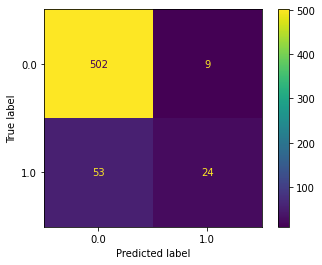

In [265]:
# calcula las matriz de confusión y las métricas de evaluación con el conjunto 
# de prueba para la mejor Máquina de Vectores de Soporte
ConfusionMatrixDisplay.from_estimator(svmc_model, X_test, y_test)
print(classification_report(y_test, svmc_model.predict(X_test))) 

## Mejor Modelo de Aprendizaje mediante Curva ROC

<Figure size 432x288 with 0 Axes>

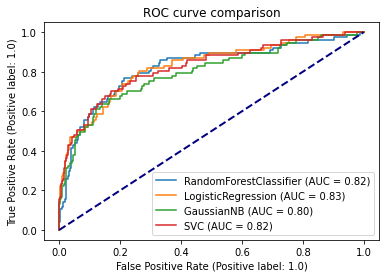

In [267]:
# Calcular y mostrar las curvas ROC de cada modelo de aprendizaje
# y sus métricas de área bajo la curva (AUC) sobre el conjunto de prueba
from sklearn.metrics import RocCurveDisplay

plt.figure()
lw = 2
disp = RocCurveDisplay.from_estimator(rfc_model, X_test, y_test)
RocCurveDisplay.from_estimator(lrc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(gnbc_model, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(svmc_model, X_test, y_test, ax=disp.ax_)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.title("ROC curve comparison")
plt.legend(loc="lower right")
plt.show()

##### Conclusión: El modelo de LogisticRegression fue el mejor con un AUC de 0.89